In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 

In [16]:
image = cv2.imread("test-2.jpeg", 0)

(552, 736)


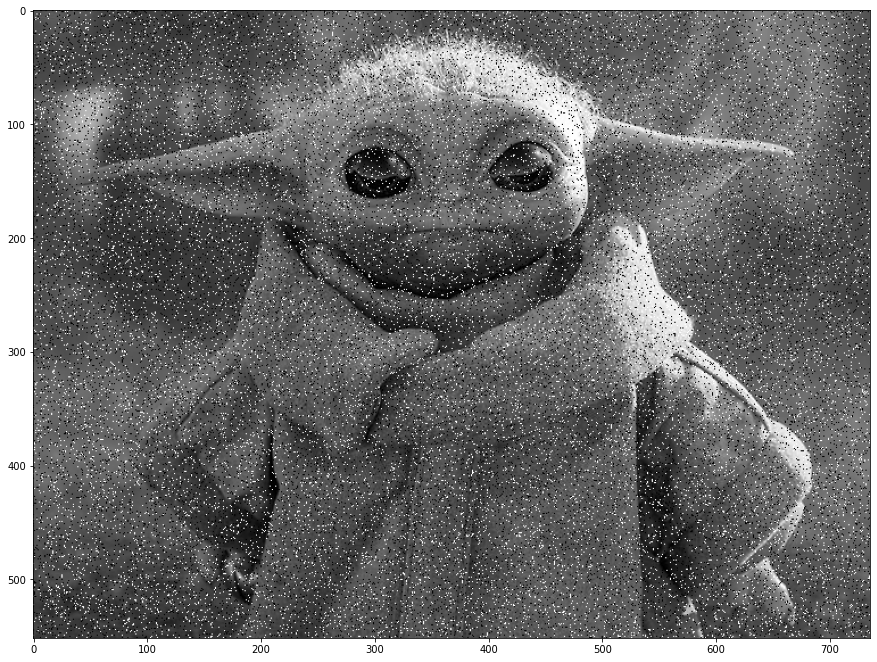

In [17]:
## Added a salt-and-pepper noise

def salt_and_pepper(image): 
    col, row = image.shape
    number_of_pixels = np.random.randint(10000,30000)
    
    for i in range (number_of_pixels):
        x_coordinate = np.random.randint(0, col)
        y_coordinate = np.random.randint(0, row)
        image[x_coordinate][y_coordinate] = 255
    
    for i in range (number_of_pixels):
        x_coordinate = np.random.randint(0, col)
        y_coordinate = np.random.randint(0, row)
        image[x_coordinate][y_coordinate] = 0

    return image
        
noisy_image = salt_and_pepper(image)
plt.figure(figsize = (15,15))
plt.imshow(noisy_image, cmap = "gray")
print(image.shape)
# cv2.imwrite("salt_and_pepper_noise_big.jpg", noisy_image)

--- 4.59185791015625 seconds ---


True

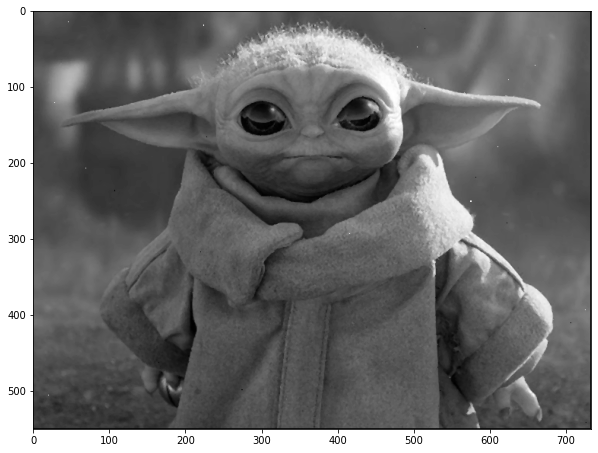

In [20]:
import time

## ============================ Create list ============================
def create_list(array):
    result = []
    col, row = array.shape
    for i in range (col):
        for j in range(row):
            result.append(array[i,j])
    return result

## ============================ Sort function ============================
def sort(input, output, i):
    global index_min

    if not (len(input) == 0) and (len(input) != 1):
        len_index = len(input) - 1
        min = input[0]

        for elem in input:
            if (min >= input[len_index - i]):  # A number was found that is less than the current number
                min = input[len_index - i]
                index_min = len_index - i
                i += 1
            else:
                i += 1

        # The minimum is found at the i-th iteration

        input.pop(index_min)
        output.append(min)
        i=0;
        sort(input, output,i)
        return output
        
    else:
        output.append(input[0])
        return output


        
## ============================ Find the median value ============================
def median_value(array):
    if (len(array)%2):                  # if the median lenght is odd then implicate the operation
        res = array[len(array)//2]
        return res  
    else: 
        pos = len(array)//2
        res = (array[pos] - array[pos-1])//2
        return res
        

## ============================ Filtering function ============================               
def filtering(image, kernel_size):
    col, row = image.shape
    
    # Define the number of mask moves
    rows_iteration = col - kernel_size
    col_iteration =  row - kernel_size

    # Create a result matrix with only zeros
    result = np.zeros((rows_iteration+1, col_iteration+1),dtype = np.uint8)
    
    for i in range(rows_iteration):
        for j in range(col_iteration):
            new_values = create_list(image[i:i+3, j:j+3])
            sort_values = sort(new_values, output=[], i=0)
            current_value = median_value(sort_values)
            result[i,j] = current_value
    return result

start_time = time.time()
new_image = filtering(noisy_image, kernel_size = 3) 
print("--- %s seconds ---" % (time.time() - start_time))
plt.figure(figsize= (10,10))
plt.imshow(new_image, cmap="gray")

cv2.imwrite("article_denoise_image.jpeg", new_image)
cv2.imwrite("article_noise_image.jpeg", noisy_image)